
PERFORMANCE MEASURES FOR FITTED GINI TREE
CLASS MEASURES:

CLASS: 1
tp: 8
fp: 15
tn: 127
fn: 2
accuracy: 0.8881578947368421
misclassrate: 0.1118421052631579
sensitivity: 0.8
FNR: 0.2
specificity: 0.8943661971830986
FPR: 0.1056338028169014
precision: 0.34782608695652173
NPV: 0.9844961240310077
F1score: 0.48484848484848486

CLASS: 2
tp: 0
fp: 0
tn: 125
fn: 27
accuracy: 0.8223684210526315
misclassrate: 0.17763157894736842
sensitivity: 0.0
FNR: 1.0
specificity: 1.0
FPR: 0.0
precision: 0
NPV: 0.8223684210526315
F1score: 0.0

CLASS: 3
tp: 5
fp: 21
tn: 106
fn: 20
accuracy: 0.7302631578947368
misclassrate: 0.26973684210526316
sensitivity: 0.2
FNR: 0.8
specificity: 0.8346456692913385
FPR: 0.16535433070866143
precision: 0.19230769230769232
NPV: 0.8412698412698413
F1score: 0.19607843137254902

CLASS: 4
tp: 23
fp: 53
tn: 58
fn: 18
accuracy: 0.5328947368421053
misclassrate: 0.46710526315789475
sensitivity: 0.5609756097560976
FNR: 0.43902439024390244
specificity: 0.5225225225225225
FPR: 0.477477477

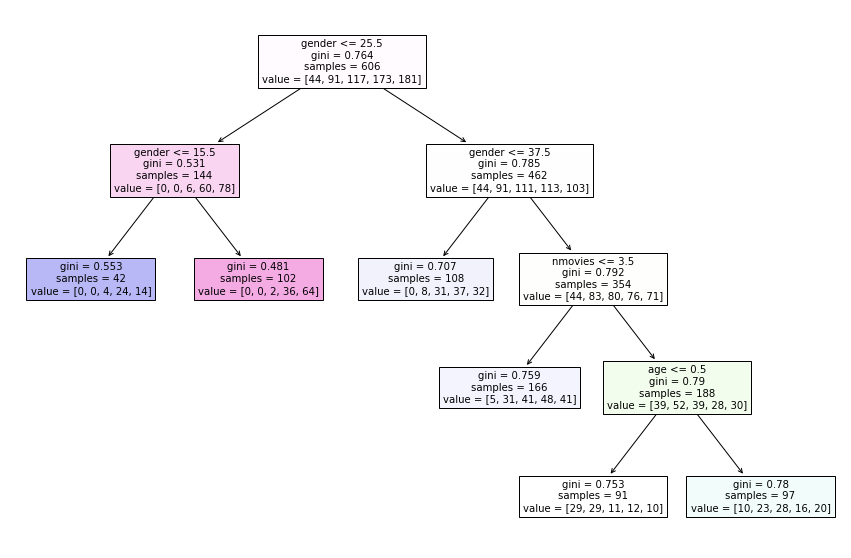

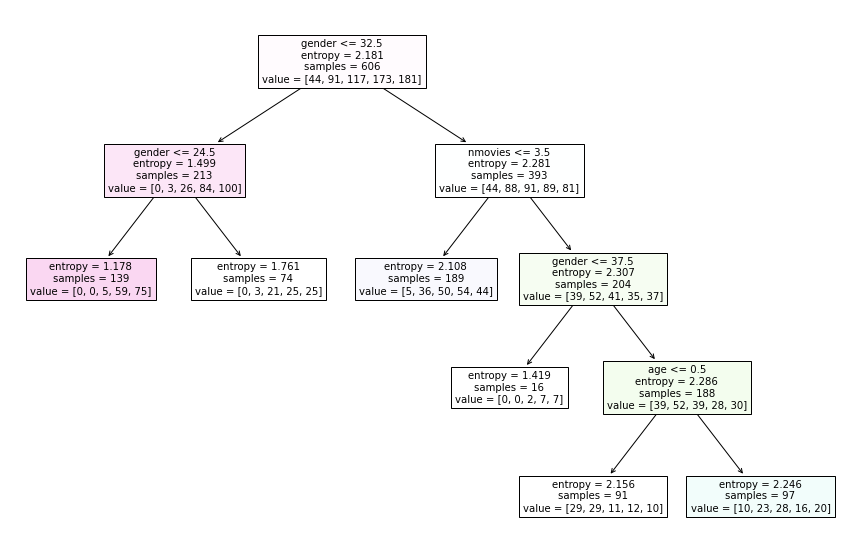

In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

movie_data=pandas.read_csv('C:/Users/000110888/Desktop/movie_data.csv')
code_gender={'M':1,'F':0}
code_member={'yes':1,'no':0}
code_rating={'very bad':1,'bad':2,'okay':3,'good':4,'very good':5}

movie_data['gender']=movie_data['gender'].map(code_gender)
movie_data['member']=movie_data['member'].map(code_member)
movie_data['rating']=movie_data['rating'].map(code_rating)

X=movie_data.iloc[:,0:4].values
y=movie_data.iloc[:,4].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=687088)

#########################################################################

#DEFINING FUNCTION FOR COMPUTING PERFORMANCE MEASURES
def perf_measures():
    
    #COMPUTING PERFORMANCE MEASURES FOR INDIVIDUAL CLASSES
    tp=[]
    fp=[]
    tn=[]
    fn=[]

    for cls in range(0,5):
        tp_sum=0
        fp_sum=0
        tn_sum=0
        fn_sum=0
        for sub1, sub2 in zip(predclass, y_test):
            
            if sub1==cls+1 and sub2==cls+1:
                tp_class=1
                tp_sum+=tp_class
            else:
                tp_class=0
            
            if sub1==cls+1 and sub2!=cls+1:
                fp_class=1
                fp_sum+=fp_class
            
            else:
                fp_class=0  
            
            if sub1!=cls+1 and sub2!=cls+1:
                tn_class=1
                tn_sum+=tn_class
            else:
                tn_class=0

            if sub1!=cls+1 and sub2==cls+1:
                fn_class=1
                fn_sum+=fn_class
            else:
                fn_class=0
       
        tp.append(tp_sum)
        fp.append(fp_sum)
        tn.append(tn_sum)
        fn.append(fn_sum)


    accuracy=[]
    misclassrate=[]
    sensitivity=[]
    FNR=[]
    specificity=[]
    FPR=[]
    precision=[]
    NPV=[]
    F1score=[]    

    print('CLASS MEASURES:')
    for cls in range(5):
        accuracy_cls=(tp[cls]+tn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        misclassrate_cls=(fp[cls]+fn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        sensitivity_cls=tp[cls]/(tp[cls]+fn[cls])
        FNR_cls=fn[cls]/(tp[cls]+fn[cls])
        specificity_cls=tn[cls]/(fp[cls]+tn[cls])
        FPR_cls=fp[cls]/(fp[cls]+tn[cls])
        if tp[cls]+fp[cls]==0:
            precision_cls=0
        else:
            precision_cls=tp[cls]/(tp[cls]+fp[cls])
        NPV_cls=tn[cls]/(fn[cls]+tn[cls])
        F1score_cls=2*tp[cls]/(2*tp[cls]+fn[cls]+fp[cls])
    
        accuracy.append(accuracy_cls)
        misclassrate.append(misclassrate_cls)
        sensitivity.append(sensitivity_cls)
        FNR.append(FNR_cls)
        specificity.append(specificity_cls)
        FPR.append(FPR_cls)
        precision.append(precision_cls)
        NPV.append(NPV_cls)
        F1score.append(F1score_cls)
    
        print()
        print('CLASS:', cls+1)
        print('tp:', tp[cls])
        print('fp:', fp[cls])
        print('tn:', tn[cls])
        print('fn:', fn[cls])
        print('accuracy:', accuracy[cls])
        print('misclassrate:', misclassrate[cls])
        print('sensitivity:', sensitivity[cls])
        print('FNR:', FNR[cls])
        print('specificity:', specificity[cls])
        print('FPR:', FPR[cls])
        print('precision:', precision[cls])
        print('NPV:', NPV[cls])
        print('F1score:', F1score[cls])
    
    #COMPUTING MICRO MEASURES 
    tp_sum=numpy.sum(tp)
    fp_sum=numpy.sum(fp)
    tn_sum=numpy.sum(tn)
    fn_sum=numpy.sum(fn)

    print()
    print('MICRO MEASURES:')
    accuracy_micro=(tp_sum+tn_sum)/(tp_sum+fp_sum+tn_sum+fn_sum)
    misclassrate_micro=(fp_sum+fn_sum)/(tp_sum+fp_sum+tn_sum+fn_sum)
    sensitivity_micro=tp_sum/(tp_sum+fn_sum)
    FNR_micro=fn_sum/(tp_sum+fn_sum)
    specificity_micro=tn_sum/(fp_sum+tn_sum)
    FPR_micro=fp_sum/(fp_sum+tn_sum)
    precision_micro=tp_sum/(tp_sum+fp_sum)
    NPV_micro=tn_sum/(fn_sum+tn_sum)
    F1score_micro=2*tp_sum/(2*tp_sum+fn_sum+fp_sum)

    print('accuracy:', accuracy_micro)
    print('misclassrate:', misclassrate_micro)
    print('sensitivity:', sensitivity_micro)
    print('FNR:', FNR_micro)
    print('specificity:', specificity_micro)
    print('FPR:', FPR_micro)
    print('precision:', precision_micro)
    print('NPV:', NPV_micro)
    print('F1-score:', F1score_micro)
      
    #COMPUTING MACRO MEASURES
    accuracy_macro=numpy.mean(accuracy)
    misclassrate_macro=numpy.mean(misclassrate)
    sensitivity_macro=numpy.mean(sensitivity)
    FNR_macro=numpy.mean(FNR)
    specificity_macro=numpy.mean(specificity)
    FPR_macro=numpy.mean(FPR)
    precision_macro=numpy.mean(precision)
    NPV_macro=numpy.mean(NPV)
    F1score_macro=numpy.mean(F1score)

    print()
    print('MACRO MEASURES:')
    print('accuracy:', accuracy_macro)
    print('misclassrate:', misclassrate_macro)
    print('sensitivity:', sensitivity_macro)
    print('FNR:', FNR_macro)
    print('specificity:', specificity_macro)
    print('FPR:', FPR_macro)
    print('precision:', precision_macro)
    print('NPV:', NPV_macro)
    print('F1-score:', F1score_macro)

    #COMPUTING WEIGHTED MACRO MEASURES
    weight=[]

    for cls in range(5):
        weight_cls=(tp[cls]+fn[cls])/(tp[cls]+fp[cls]+tn[cls]+fn[cls])
        weight.append(weight_cls)

    accuracy_wmacro=numpy.dot(weight,accuracy)
    misclassrate_wmacro=numpy.dot(weight,misclassrate)
    sensitivity_wmacro=numpy.dot(weight,sensitivity)
    FNR_wmacro=numpy.dot(weight,FNR)
    specificity_wmacro=numpy.dot(weight,specificity)
    FPR_wmacro=numpy.dot(weight,FPR)
    precision_wmacro=numpy.dot(weight,precision)
    NPV_wmacro=numpy.dot(weight,NPV)
    F1score_wmacro=numpy.dot(weight,F1score)

    print()
    print('WEIGHTED MACRO MEASURES:')
    print('accuracy:', accuracy_wmacro)
    print('misclassrate:', misclassrate_wmacro)
    print('sensitivity:', sensitivity_wmacro)
    print('FNR:', FNR_wmacro)
    print('specificity:', specificity_wmacro)
    print('FPR:', FPR_wmacro)
    print('precision:', precision_wmacro)
    print('NPV:', NPV_wmacro)
    print('F1-score:', F1score_wmacro)

#########################################################################

#FITTING MULTINOMIAL CLASSIFICATION TREE WITH GINI SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=707720)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#PLOTTING FITTED TREE 
fig=plt.figure(figsize=(15,10))
tree.plot_tree(gini_tree.fit, feature_names=['gender','age','member','nmovies'], filled=True)

#COMPUTING PREDICTED VALUES FOR TESTING DATA
y_pred=gini_tree.predict_proba(X_test) 

#DETERMINING PREDICTED CLASSES
predclass=[]
for i  in range(0, len(y_pred)):
    list=[y_pred[i,0],y_pred[i,1], y_pred[i,2], y_pred[i,3], y_pred[i,4]]
    predclass.append(list.index(max(list))+1)
predclass=numpy.asarray(predclass)
    
#COMPUTING PERFORMANCE MEASURES FOR FITTED GINI TREE
print()
print('PERFORMANCE MEASURES FOR FITTED GINI TREE')
perf_measures()

#########################################################################

#FITTING MULTINOMIAL CLASSIFICATION TREE WITH ENTROPY SPLITTING CRITERION
entropy_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='entropy', random_state=707720)
entropy_tree.fit=entropy_tree.fit(X_train,y_train)

#PLOTTING FITTED TREE 
fig=plt.figure(figsize=(15,10))
tree.plot_tree(entropy_tree.fit, feature_names=['gender','age','member','nmovies'], filled=True)

#COMPUTING PREDICTED VALUES FOR TESTING DATA
y_pred=entropy_tree.predict_proba(X_test) 

#DETERMINING PREDICTED CLASSES
predclass=[]
for i  in range(0, len(y_pred)):
    list=[y_pred[i,0],y_pred[i,1], y_pred[i,2], y_pred[i,3], y_pred[i,4]]
    predclass.append(list.index(max(list))+1)
predclass=numpy.asarray(predclass)
    
#COMPUTING PERFORMANCE MEASURES FOR FITTED ENTROPY TREE
print()
print('PERFORMANCE MEASURES FOR FITTED ENTROPY TREE')
perf_measures()

#########################################################################

#FITTING MULTINOMIAL CLASSIFICATION TREE WITH CHAID SPLITTING CRITERION (ORDINAL CHAID TREE)
from chefboost import Chefboost

movie_data=pandas.read_csv('C:/Users/000110888/Desktop/movie_data.csv')
code_gender={'M':1,'F':0}
code_member={'yes':1,'no':0}
#Note: rating is used as nominal

movie_data['gender']=movie_data['gender'].map(code_gender)
movie_data['member']=movie_data['member'].map(code_member)

X=movie_data.iloc[:,0:4].values
y=movie_data.iloc[:,4].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=687088)

X_train=pandas.DataFrame(X_train, columns=['gender','age','member','nmovies'])
y_train=pandas.DataFrame(y_train, columns=['rating'])
train_data=pandas.concat([X_train, y_train], axis=1) #one-to-one concatenation

#FITTING BINARY TREE WITH CHAID SPLITTING ALGORITHM
config={'algorithm': 'CHAID', 'max_depth': 3}
tree_chaid=Chefboost.fit(train_data, config, target_label='rating')

#COMPUTING PREDICTION ACCURACY
X_test=pandas.DataFrame(X_test, columns=['gender','age','member','nmovies'])

y_pred=[]
for i in range(len(y_test)):
    y_pred.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))
predclass = numpy.asarray(y_pred)

#COMPUTING PERFORMANCE MEASURES FOR FITTED CHAID TREE
#turning rating into ordinal to use perf_measures function
code_rating={'very bad':1,'bad':2,'okay':3,'good':4,'very good':5}
df=pandas.DataFrame({'y_test': y_test,'predclass': predclass})
df['y_test']=df['y_test'].map(code_rating)
df['predclass']=df['predclass'].map(code_rating)
y_test=df['y_test']
predclass=df['predclass']

print()
print('PERFORMANCE MEASURES FOR FITTED CHAID TREE')
perf_measures()
